# 安裝YOLOv5 相關套件

In [1]:
#!pip install torch torchvision numpy pyyaml tqdm opencv-python pandas requests pillow matplotlib seaborn tensorboard 
#!pip install gitpython comet_m1
!pip install -r requirements.txt

import torch
import utils
display = utils.notebook_init()  # checks

YOLOv5  v7.0-30-g342fe05 Python-3.8.15 torch-1.13.0+cpu CPU


Setup complete  (24 CPUs, 63.9 GB RAM, 155.2/755.3 GB disk)


# 測試YOLOv5

In [2]:
import torch

# Model 共有 yolov5n, yolov5s, yolov5m, yolov5l, yolov5x五種
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')  # or yolov5n - yolov5x6, custom

# Images
img = 'https://ultralytics.com/images/zidane.jpg'  # or file, Path, PIL, OpenCV, numpy, list

# Inference
results = model(img)

# Results
results.print()  # or .show(), .save(), .crop(), .pandas(), etc.


Using cache found in C:\Users\gwojo/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  v7.0-30-g342fe05 Python-3.8.15 torch-1.13.0+cpu CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 
image 1/1: 720x1280 2 persons, 2 ties
Speed: 614.5ms pre-process, 85.5ms inference, 2.0ms NMS per image at shape (1, 3, 384, 640)


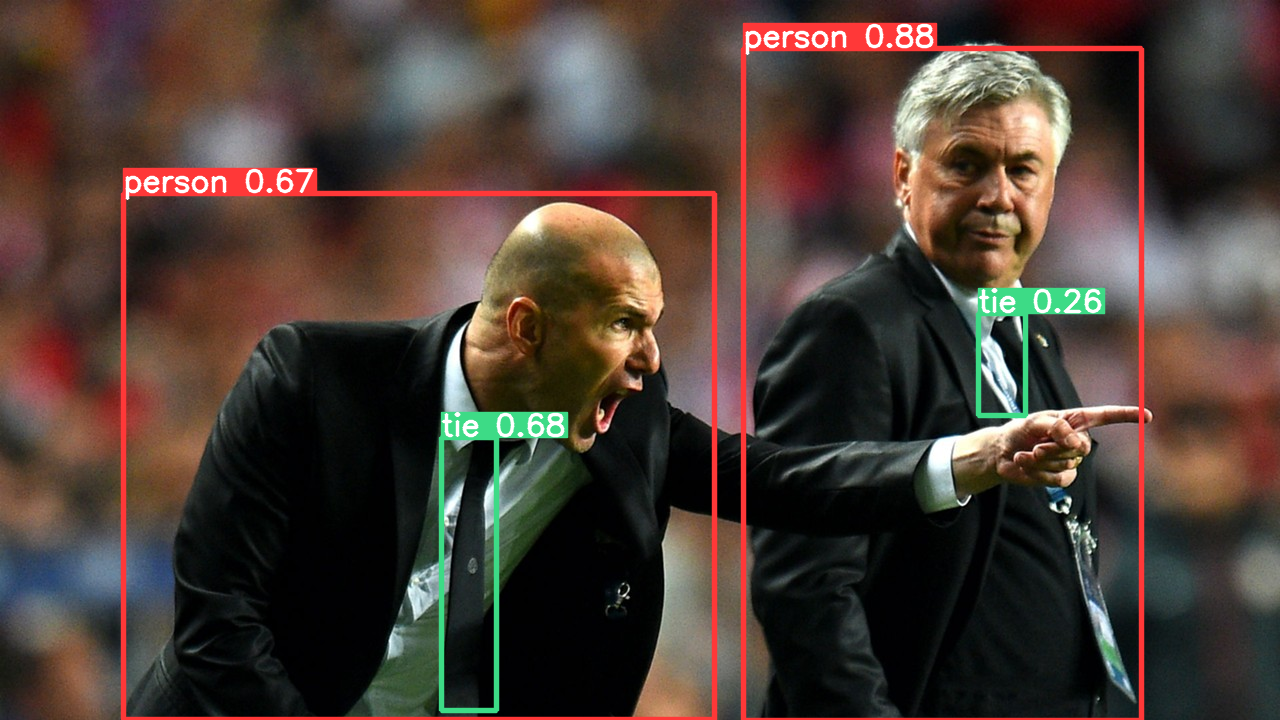

In [3]:
results.show()

In [4]:
results.save()  # 檔案存到 runs\detect資料夾中

Saved 1 image to runs\detect\exp2


In [5]:
results.xywh

[tensor([[9.42523e+02, 3.84172e+02, 3.98466e+02, 6.71656e+02, 8.79861e-01, 0.00000e+00],
         [4.69287e+02, 5.73686e+02, 5.45955e+01, 2.72699e+02, 6.75119e-01, 2.70000e+01],
         [4.18871e+02, 4.56505e+02, 5.91640e+02, 5.26533e+02, 6.66693e-01, 0.00000e+00],
         [1.00215e+03, 3.64553e+02, 4.63130e+01, 1.01947e+02, 2.61517e-01, 2.70000e+01]])]

# 使用detect.py 偵測
```shell
python detect.py --source 0  # webcam
                          img.jpg  # image 
                          vid.mp4  # video
                          screen  # screenshot
                          path/  # directory
                         'path/*.jpg'  # glob
                         'https://youtu.be/Zgi9g1ksQHc'  # YouTube
                         'rtsp://example.com/media.mp4'  # RTSP, RTMP, HTTP stream
```

In [60]:
#%run detect.py --source video1.mp4

In [6]:
%run detect.py --source https://ultralytics.com/images/zidane.jpg

detect: weights=yolov5s.pt, source=https://ultralytics.com/images/zidane.jpg, data=data\coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs\detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1


  0%|          | 0.00/165k [00:00<?, ?B/s]

YOLOv5  v7.0-30-g342fe05 Python-3.8.15 torch-1.13.0+cpu CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
image 1/1 E:\Talk221212\yolov5\zidane.jpg: 384x640 2 persons, 2 ties, 78.6ms
Speed: 1.0ms pre-process, 78.6ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs\detect\exp3


# 訓練coco128 資料集

## 下載及解壓縮coco128資料集

In [62]:
torch.hub.download_url_to_file('https://ultralytics.com/assets/coco128.zip', 'tmp.zip')
!tar -xf tmp.zip 
!mkdir datasets
!move coco128 datasets


  0%|          | 0.00/6.66M [00:00<?, ?B/s]

        1 dir(s) moved.


## 1. 使用coco128 資料集訓練網路

In [7]:
!python train.py --img 640 --batch 4 --epochs 3 --data mycoco128.yaml --weights yolov5n.pt 

^C


## 2. 測試訓練後網路效能

In [3]:
!python detect.py --weights runs/train/exp13/weights/best.pt --img 600 --conf 0.2 --source ../datasets/coco128/images/train2017

detect: weights=['runs/train/exp13/weights/best.pt'], source=../datasets/coco128/images/train2017, data=data\coco128.yaml, imgsz=[600, 600], conf_thres=0.2, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs\detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5  v7.0-30-g342fe05 Python-3.8.15 torch-1.13.0+cpu CPU

Fusing layers... 
Model summary: 157 layers, 1867405 parameters, 0 gradients, 4.5 GFLOPs
WARNING  --img-size [600, 600] must be multiple of max stride 32, updating to [608, 608]
image 1/128 E:\Talk221212\datasets\coco128\images\train2017\000000000009.jpg: 480x608 3 bowls, 1 orange, 2 broccolis, 2 carrots, 1 donut, 61.6ms
image 2/128 E:\Talk221212\datasets\coco128\images\train2017\000000000025.jpg: 416x608 2 giraffes, 51.0ms
image 3/128 E:\Tal

In [4]:
!python detect.py --weights runs/train/exp/weights/best.pt --img 600 --conf 0.1 --source video1.mp4

detect: weights=['runs/train/exp/weights/best.pt'], source=video1.mp4, data=data\coco128.yaml, imgsz=[600, 600], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs\detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5  v7.0-30-g342fe05 Python-3.8.15 torch-1.13.0+cpu CPU

Fusing layers... 
Model summary: 157 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
WARNING  --img-size [600, 600] must be multiple of max stride 32, updating to [608, 608]
Traceback (most recent call last):
  File "detect.py", line 261, in <module>
    main(opt)
  File "detect.py", line 256, in main
    run(**vars(opt))
  File "C:\Users\gwojo\anaconda3\envs\yolov5-1\lib\site-packages\torch\autograd\grad_mode.py", line 27, in decorate_context
    return func(*args

# 訓練自己的資料集

## 1. 準備 yaml 訓練資料集描述檔

## 2. 使用labelimg 標註資料

In [5]:
!pip install labelimg

  Using cached labelImg-1.8.6-py2.py3-none-any.whl
  Using cached PyQt5-5.15.7-cp37-abi3-win_amd64.whl (6.8 MB)
  Using cached lxml-4.9.1-cp38-cp38-win_amd64.whl (3.6 MB)
  Using cached PyQt5_sip-12.11.0-cp38-cp38-win_amd64.whl (78 kB)
  Using cached PyQt5_Qt5-5.15.2-py3-none-win_amd64.whl (50.1 MB)


In [6]:
!labelimg

^C
